**Purpose**: Prepare feedback data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
data_dp = Path("../data/")

In [6]:
def get_mcq_answer_counts(col, df):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    return q.explode().value_counts()

def get_mcq_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    value_counts = q.explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

def get_question_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # get unique items & counts
    value_counts = df[col].explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

# Mentors

In [3]:
url = "https://docs.google.com/spreadsheets/d/1JOnjaojSYz8J0Yg27IS73MtraIL36BgtavJWlvBuGtI/export?format=csv"
cohort_gid = {
    'OLS-1': '922543579',
    'OLS-2': '293719636',
    'OLS-3': '901891477',
    'OLS-4': '186857041',
    'OLS-5': '0',
    'OLS-6': '227796069',
}

In [4]:
cohort_df = {}
for c in cohort_gid:
    cohort_df[c] = (pd.read_csv(f"{url}&gid={cohort_gid[c]}")
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(c, "cohort",regex=True))

In [5]:
cohort_df['OLS-4']

,How were your overall mentorship training and support experience in OLS?,What expectations from the OLS program were met and where can we do better?,How was your overall experience with the mentoring calls with your mentee?,"If you followed the cohort calls (notes or videos), which of the following topics introduced in these cohort calls were useful for you?","Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?",Do you think your mentee was able to effectively engage with OLS throughout the program?,Anything else you would like to share with us?
0,I felt supported as a mentor and the training ...,,Mentoring calls were somewhat constructive,"Licensing and Code of Conduct, Knowledge Disse...","Yes I'd like to return as a mentor, Yes I'd li...","Yes, they were able to engage",
1,I felt supported as a mentor and the training ...,I really like having some initial training for...,Mentoring calls were mostly constructive,"Final presentation rehearsals, Final presentat...",Yes I'd like to return as a mentor,I think they were able to engage most of the t...,Thanks. Awesome program and organizers!
2,I felt supported as a mentor and the training ...,,Mentoring calls were mostly constructive,,"Yes I'd like to return as a mentor, Yes I'd li...","Yes, they were able to engage",
3,I felt supported as a mentor and the training ...,My mentee enjoyed the program and learnt a lot...,Mentoring calls were mostly constructive,"Mental health, self care, personal ecology","Yes I'd like to return as an expert, I would t...","Yes, they were able to engage",
4,I enjoyed my participation and did not find th...,"As usual, run excellently and a very worthwhil...",Mentoring calls were mostly constructive,"Knowledge Dissemination: Preprints, Training a...",Yes I am interesting in joining the OLS steeri...,"Yes, they were able to engage",
5,I felt supported as a mentor and the training ...,,Mentoring calls were mostly constructive,"Tooling and Roadmapping (open canvas, project ...","Yes I'd like to return as a mentor, Yes I'd li...","Yes, they were able to engage",
6,I felt supported as a mentor and the training ...,The training was great and it is nice to have ...,Mentoring calls were always constructive,"Tooling and Roadmapping (open canvas, project ...","Yes I'd like to return as a mentor, Yes I'd li...",I think Arent was very much capable to effecti...,
7,I felt supported as a mentor and the training ...,,Mentoring calls were mostly constructive,"Tooling and Roadmapping (open canvas, project ...","Yes I'd like to return as a mentor, Yes I am i...","No, they had difficulty engaging or attending ...",You guys are doing an incredible job! Well don...
8,I felt supported as a mentor and the training ...,,Mentoring calls were somewhat constructive,,Yes I am interesting in joining the OLS steeri...,"No, they had difficulty engaging or attending ...",
9,I felt supported as a mentor and the training ...,My expectations that were met: I got to mentor...,Mentoring calls were mostly constructive,"Tooling and Roadmapping (open canvas, project ...",I am not sure yet but ask me later,"No, they had difficulty engaging or attending ...","All the resources (notes, syllabus, videos, Sl..."


## Question: "How were your overall mentorship training and support experience in OLS?"

Possible answers:
- I felt supported as a mentor and the training offered in the cohort was adequate
- I felt supported as a mentor but the training offered in the cohort can be improved
- I enjoyed my participation and did not find the experience overwhelming
- I found the mentorship responsibilities overwhelming
- I did not feel supported as a mentor
- Other

In [7]:
q1 = {}
other_answer = []
col = "How were your overall mentorship training and support experience in OLS?"
answers = [
    "I felt supported as a mentor and the training offered in the cohort was adequate",
    "I felt supported as a mentor but the training offered in the cohort can be improved",
    "I enjoyed my participation and did not find the experience overwhelming",
    "I found the mentorship responsibilities overwhelming",
    "I did not feel supported as a mentor",
    "Other"]
for c in cohort_df:
    q1[c], oa = get_mcq_possible_answers_counts(col, cohort_df[c], answers)
    other_answer += oa
q1_df = pd.DataFrame.from_dict(q1)
q1_df

,OLS-1,OLS-2,OLS-3,OLS-4,OLS-5,OLS-6
I felt supported as a mentor and the training offered in the cohort was adequate,4,19,24,17,19,17
I felt supported as a mentor but the training offered in the cohort can be improved,3,1,0,0,1,1
I enjoyed my participation and did not find the experience overwhelming,3,11,15,13,7,11
I found the mentorship responsibilities overwhelming,0,0,0,0,0,0
I did not feel supported as a mentor,0,0,0,0,0,0
Other,3,7,1,3,0,4


Text(0.5, 0, 'Number of answers')

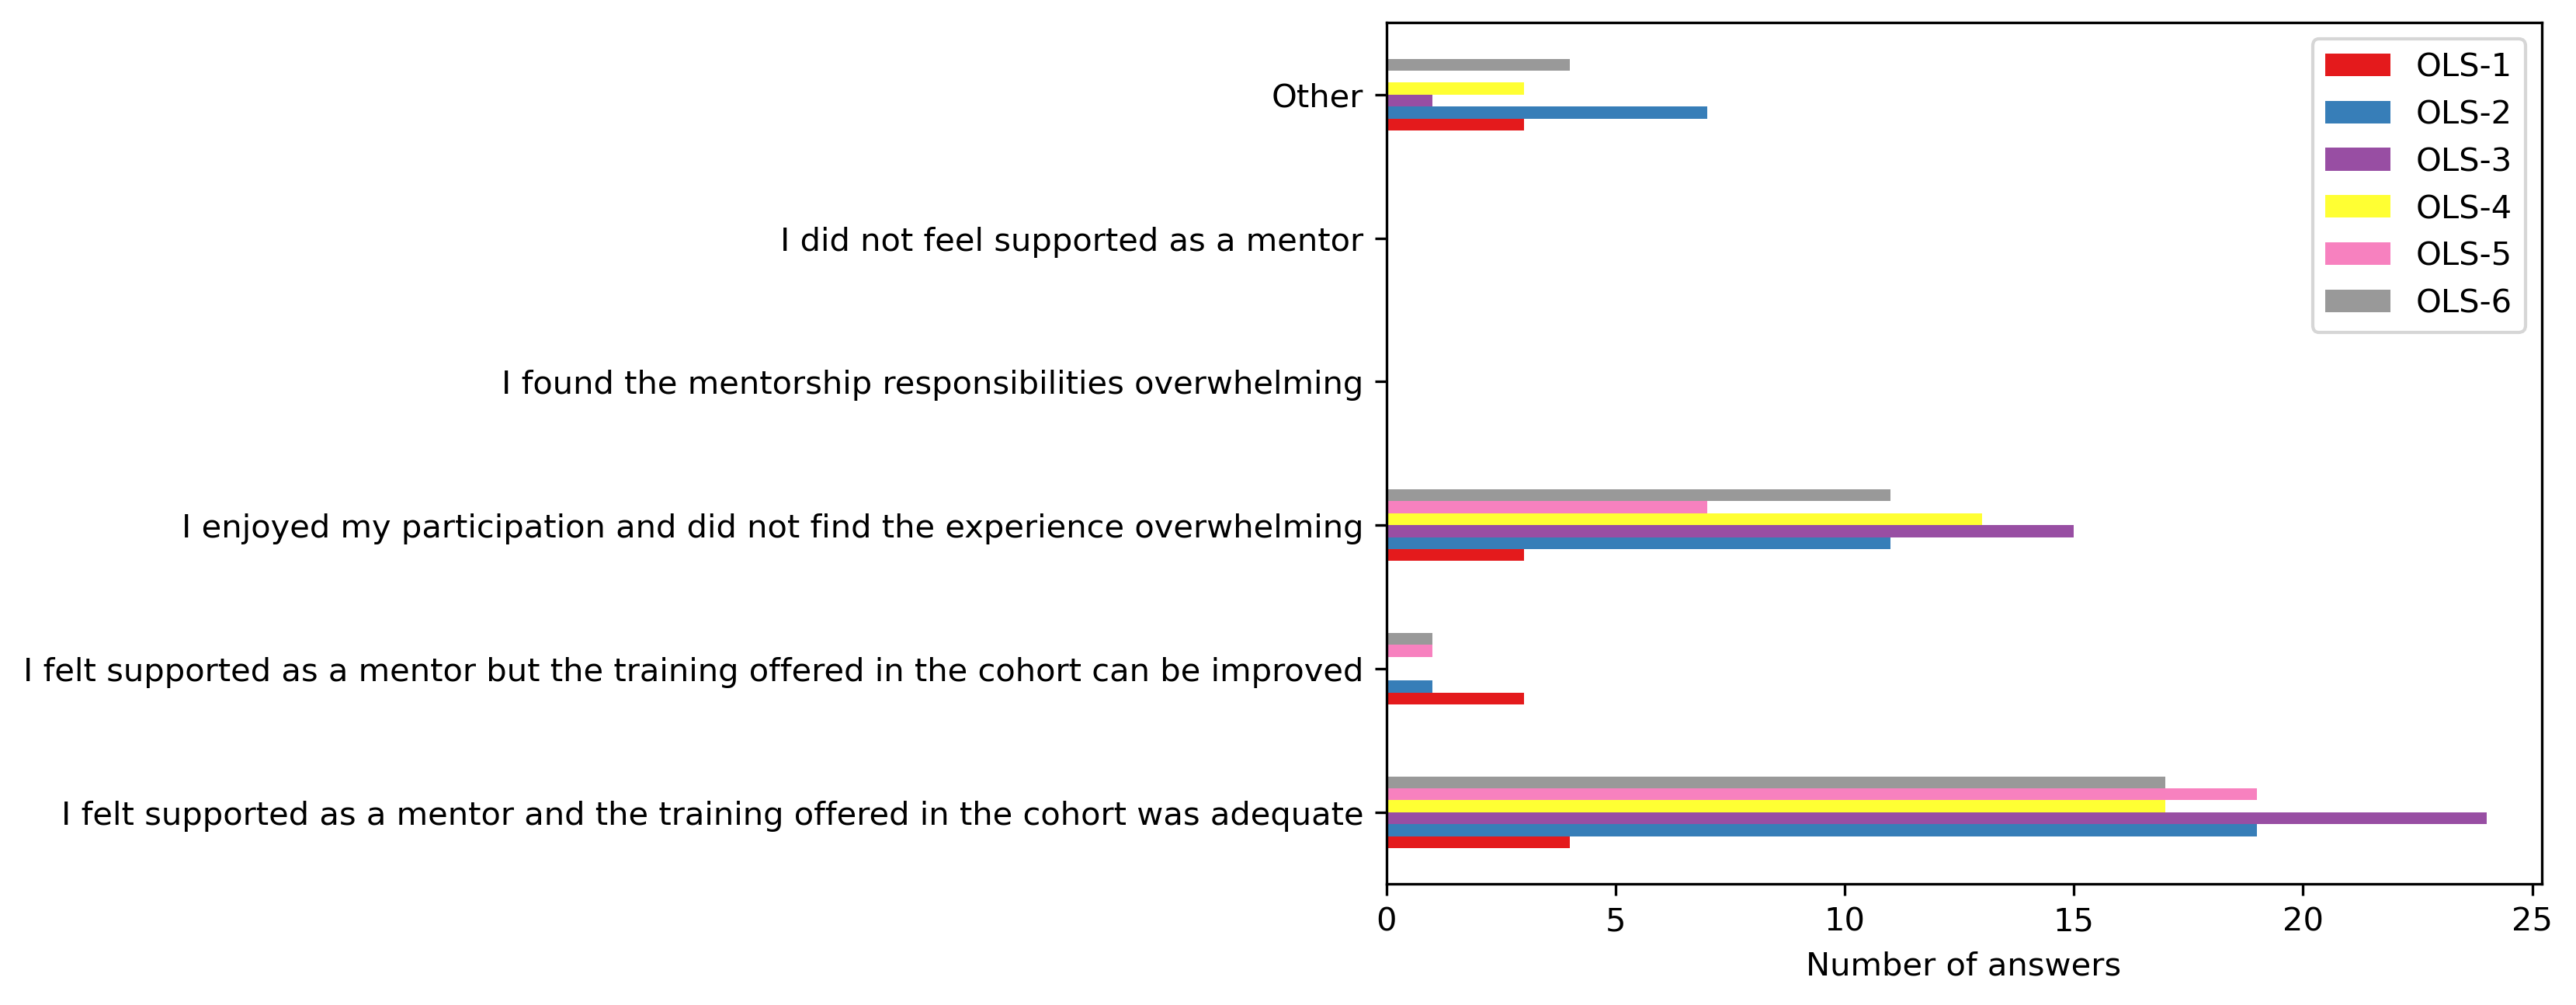

In [8]:
fig, ax = plt.subplots()
fig.set_dpi(300)
q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Number of answers')
#plt.savefig('../', bbox_inches='tight')

## Question: "How was your overall experience with the mentoring calls with your mentee?"

Possible answers:
- Mentoring calls were not structured or constructive
- Mentoring calls were somewhat constructive
- Mentoring calls were mostly constructive
- Mentoring calls were always constructive

In [9]:
q1 = {}
other_answer = []
col = "How was your overall experience with the mentoring calls with your mentee?"
answers = [
    "Mentoring calls were not structured or constructive",
    "Mentoring calls were somewhat constructive",
    "Mentoring calls were mostly constructive",
    "Mentoring calls were always constructive"]
for c in cohort_df:
    q1[c], oa = get_mcq_possible_answers_counts(col, cohort_df[c], answers)
    other_answer += oa
q1_df = pd.DataFrame.from_dict(q1)
q1_df

,OLS-1,OLS-2,OLS-3,OLS-4,OLS-5,OLS-6
Mentoring calls were not structured or constructive,0,1,1,0,0,1
Mentoring calls were somewhat constructive,2,5,4,3,2,4
Mentoring calls were mostly constructive,4,13,8,10,10,9
Mentoring calls were always constructive,3,7,14,5,9,5


Text(0.5, 0, 'Number of answers')

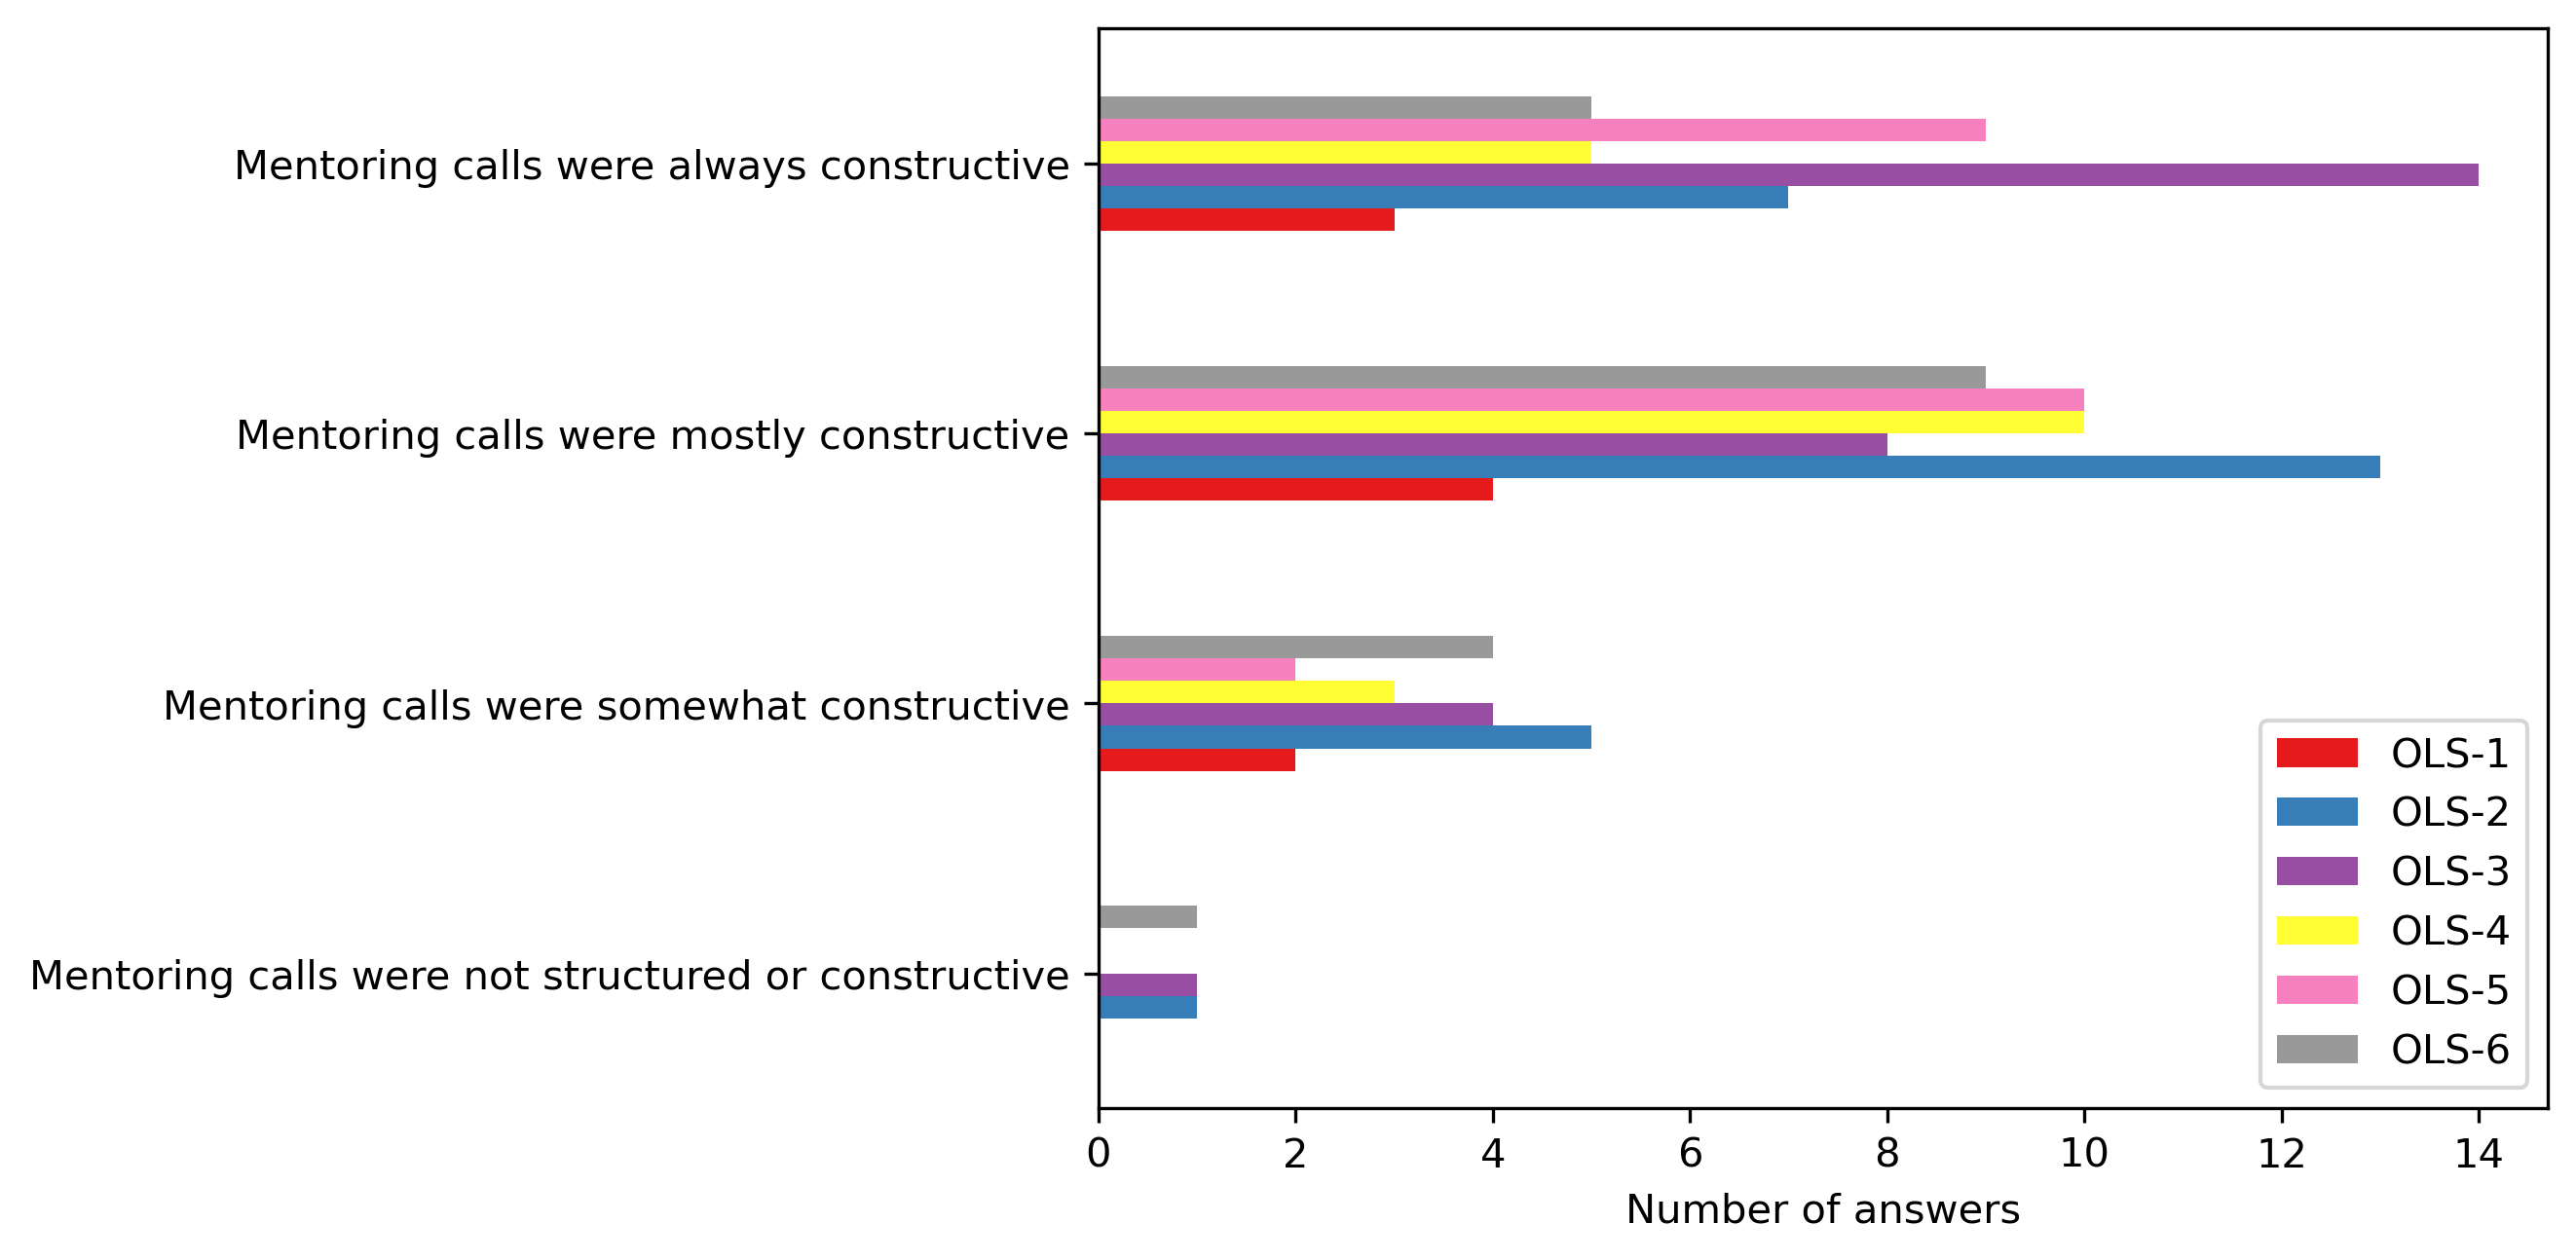

In [10]:
fig, ax = plt.subplots()
fig.set_dpi(300)
q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Number of answers')
#plt.savefig('../', bbox_inches='tight')

## Question: "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"

Possible answers:
- Yes I'd like to return as a mentor
- Yes I'd like to return as an expert
- Yes I'd like to return as a collaborator to run this program in my network
- Yes I am interesting in joining the OLS steering committee
- I am not sure yet, but ask me later
- No, I would not be able to return to OLS-6
- Other

In [11]:
q1 = {}
other_answer = []
col = "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "Yes I am interesting in joining the OLS steering committee",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in cohort_df:
    q1[c], oa = get_mcq_possible_answers_counts(col, cohort_df[c], answers)
    other_answer += oa
q1_df = pd.DataFrame.from_dict(q1)
q1_df

,OLS-1,OLS-2,OLS-3,OLS-4,OLS-5,OLS-6
Yes I'd like to return as a mentor,4,6,18,9,15,9
Yes I'd like to return as an expert,1,5,11,10,12,9
Yes I'd like to return as a collaborator to run this program in my network,0,0,4,1,2,4
Yes I am interesting in joining the OLS steering committee,0,0,0,6,3,5
I am not sure yet but ask me later,2,0,2,1,4,1
I would take a break but please keep me informed about the next cohort,0,7,1,2,0,2
No I would not be able to return,0,0,0,0,0,1
Other,2,6,15,2,3,5


Text(0.5, 0, 'Number of answers')

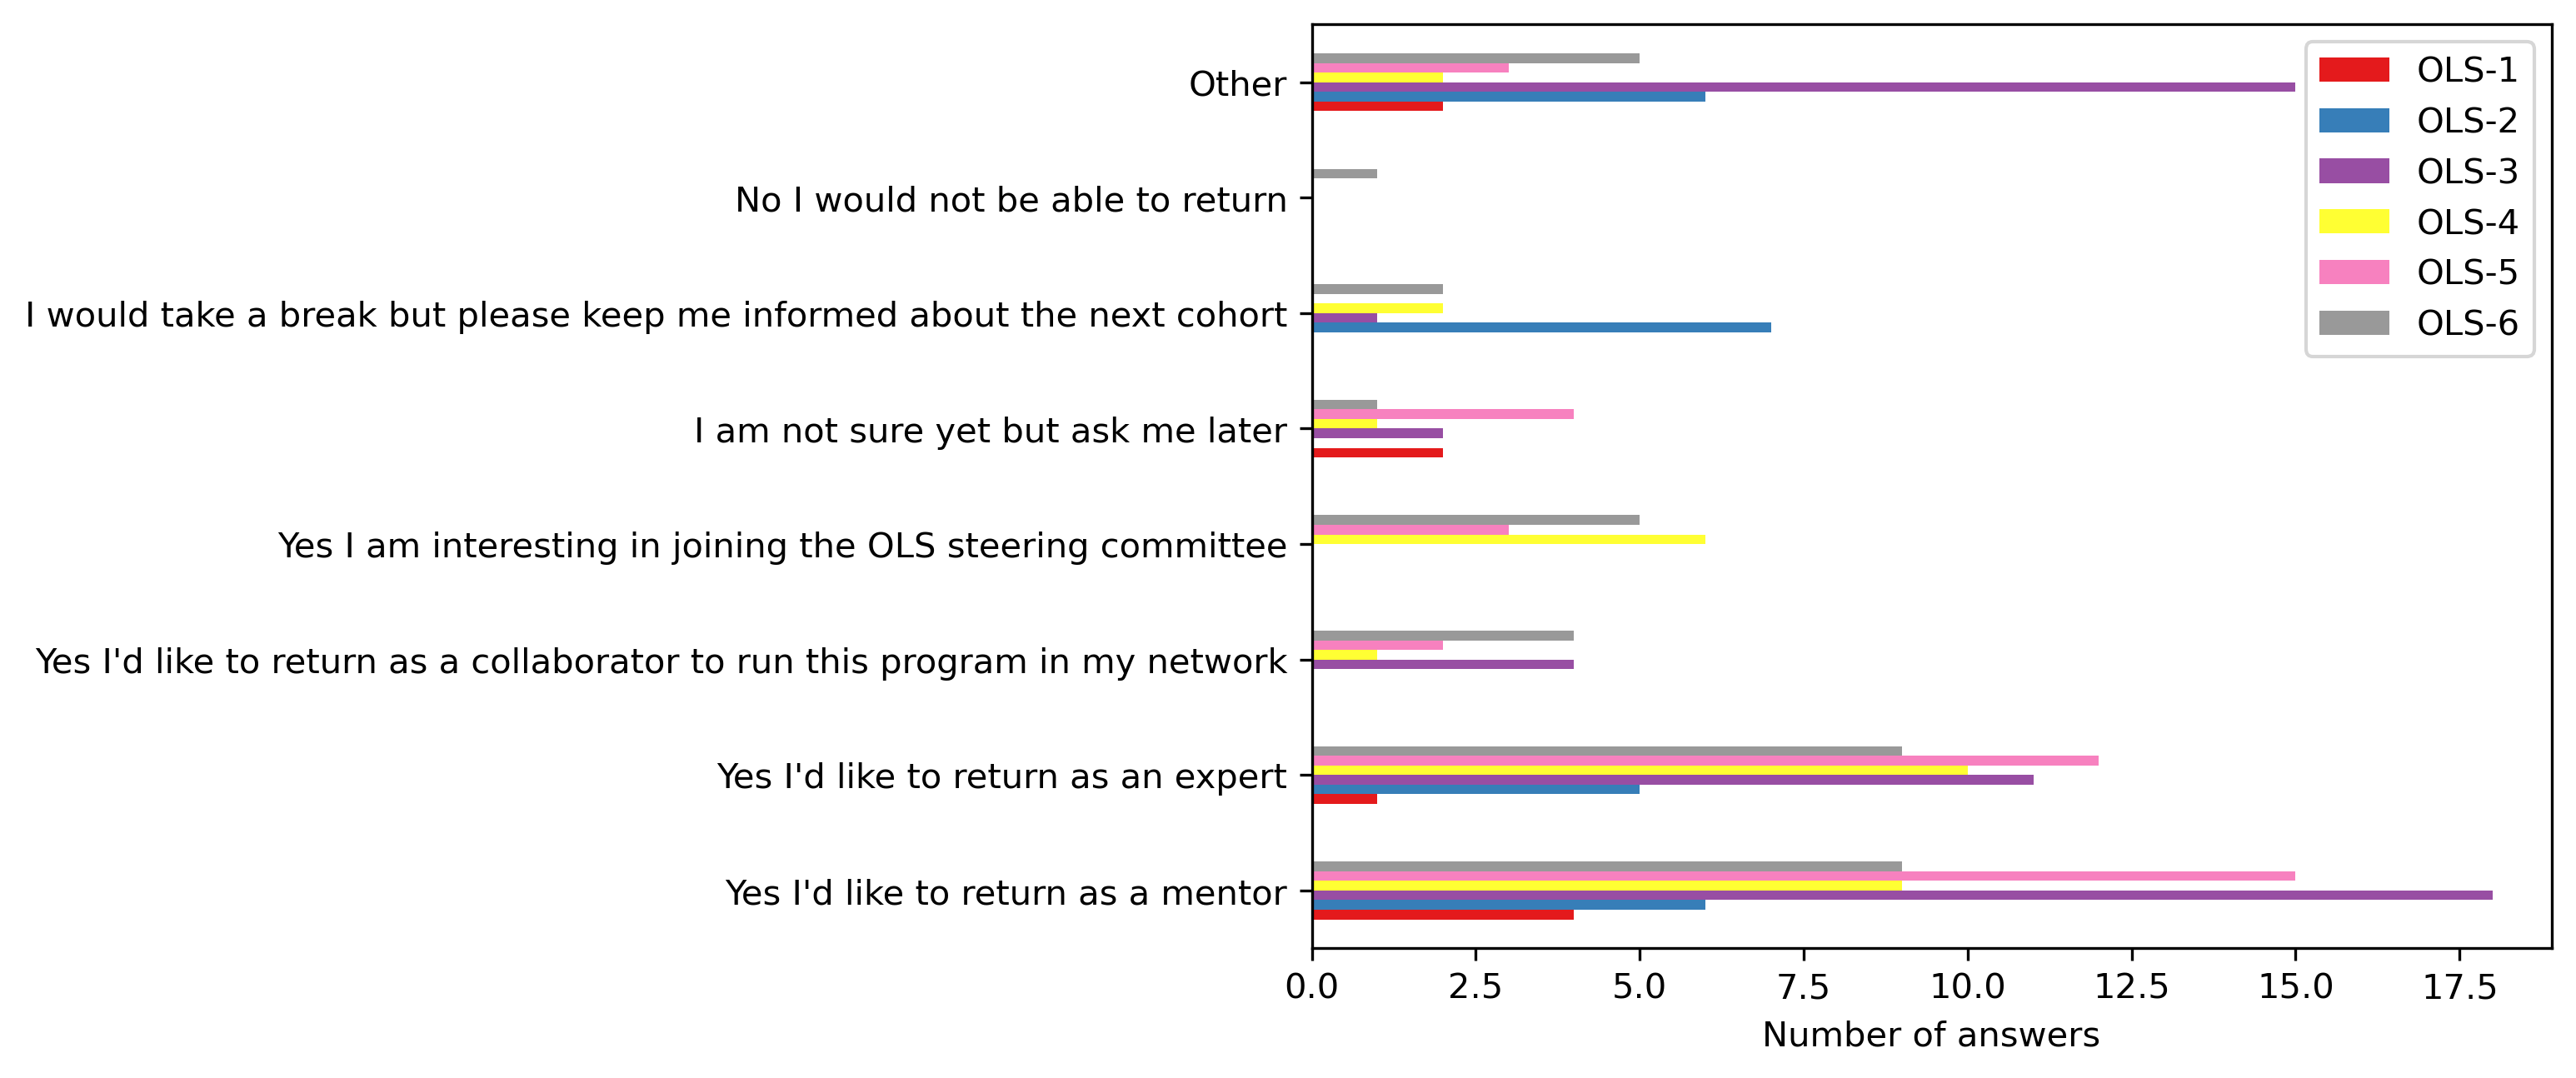

In [12]:
fig, ax = plt.subplots()
fig.set_dpi(300)
q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Number of answers')
#plt.savefig('../', bbox_inches='tight')

## Question: "Do you think your mentee was able to effectively engage with OLS throughout the program?"

Possible answers:
- Yes, they were able to engage
- No, they had difficulty engaging or attending calls
- Other


In [13]:
q1 = {}
other_answer = []
col = "Do you think your mentee was able to effectively engage with OLS throughout the program?"
answers = [
    "Yes, they were able to engage",
    "No, they had difficulty engaging or attending calls",
    "Other"]
for c in cohort_df:
    if col in cohort_df[c]:
        q1[c], oa = get_question_possible_answers_counts(col, cohort_df[c], answers)
        other_answer += oa
q1_df = pd.DataFrame.from_dict(q1)
q1_df

,OLS-4,OLS-5,OLS-6
"Yes, they were able to engage",9,14,7
"No, they had difficulty engaging or attending calls",6,4,7
Other,3,3,5


Text(0.5, 0, 'Number of answers')

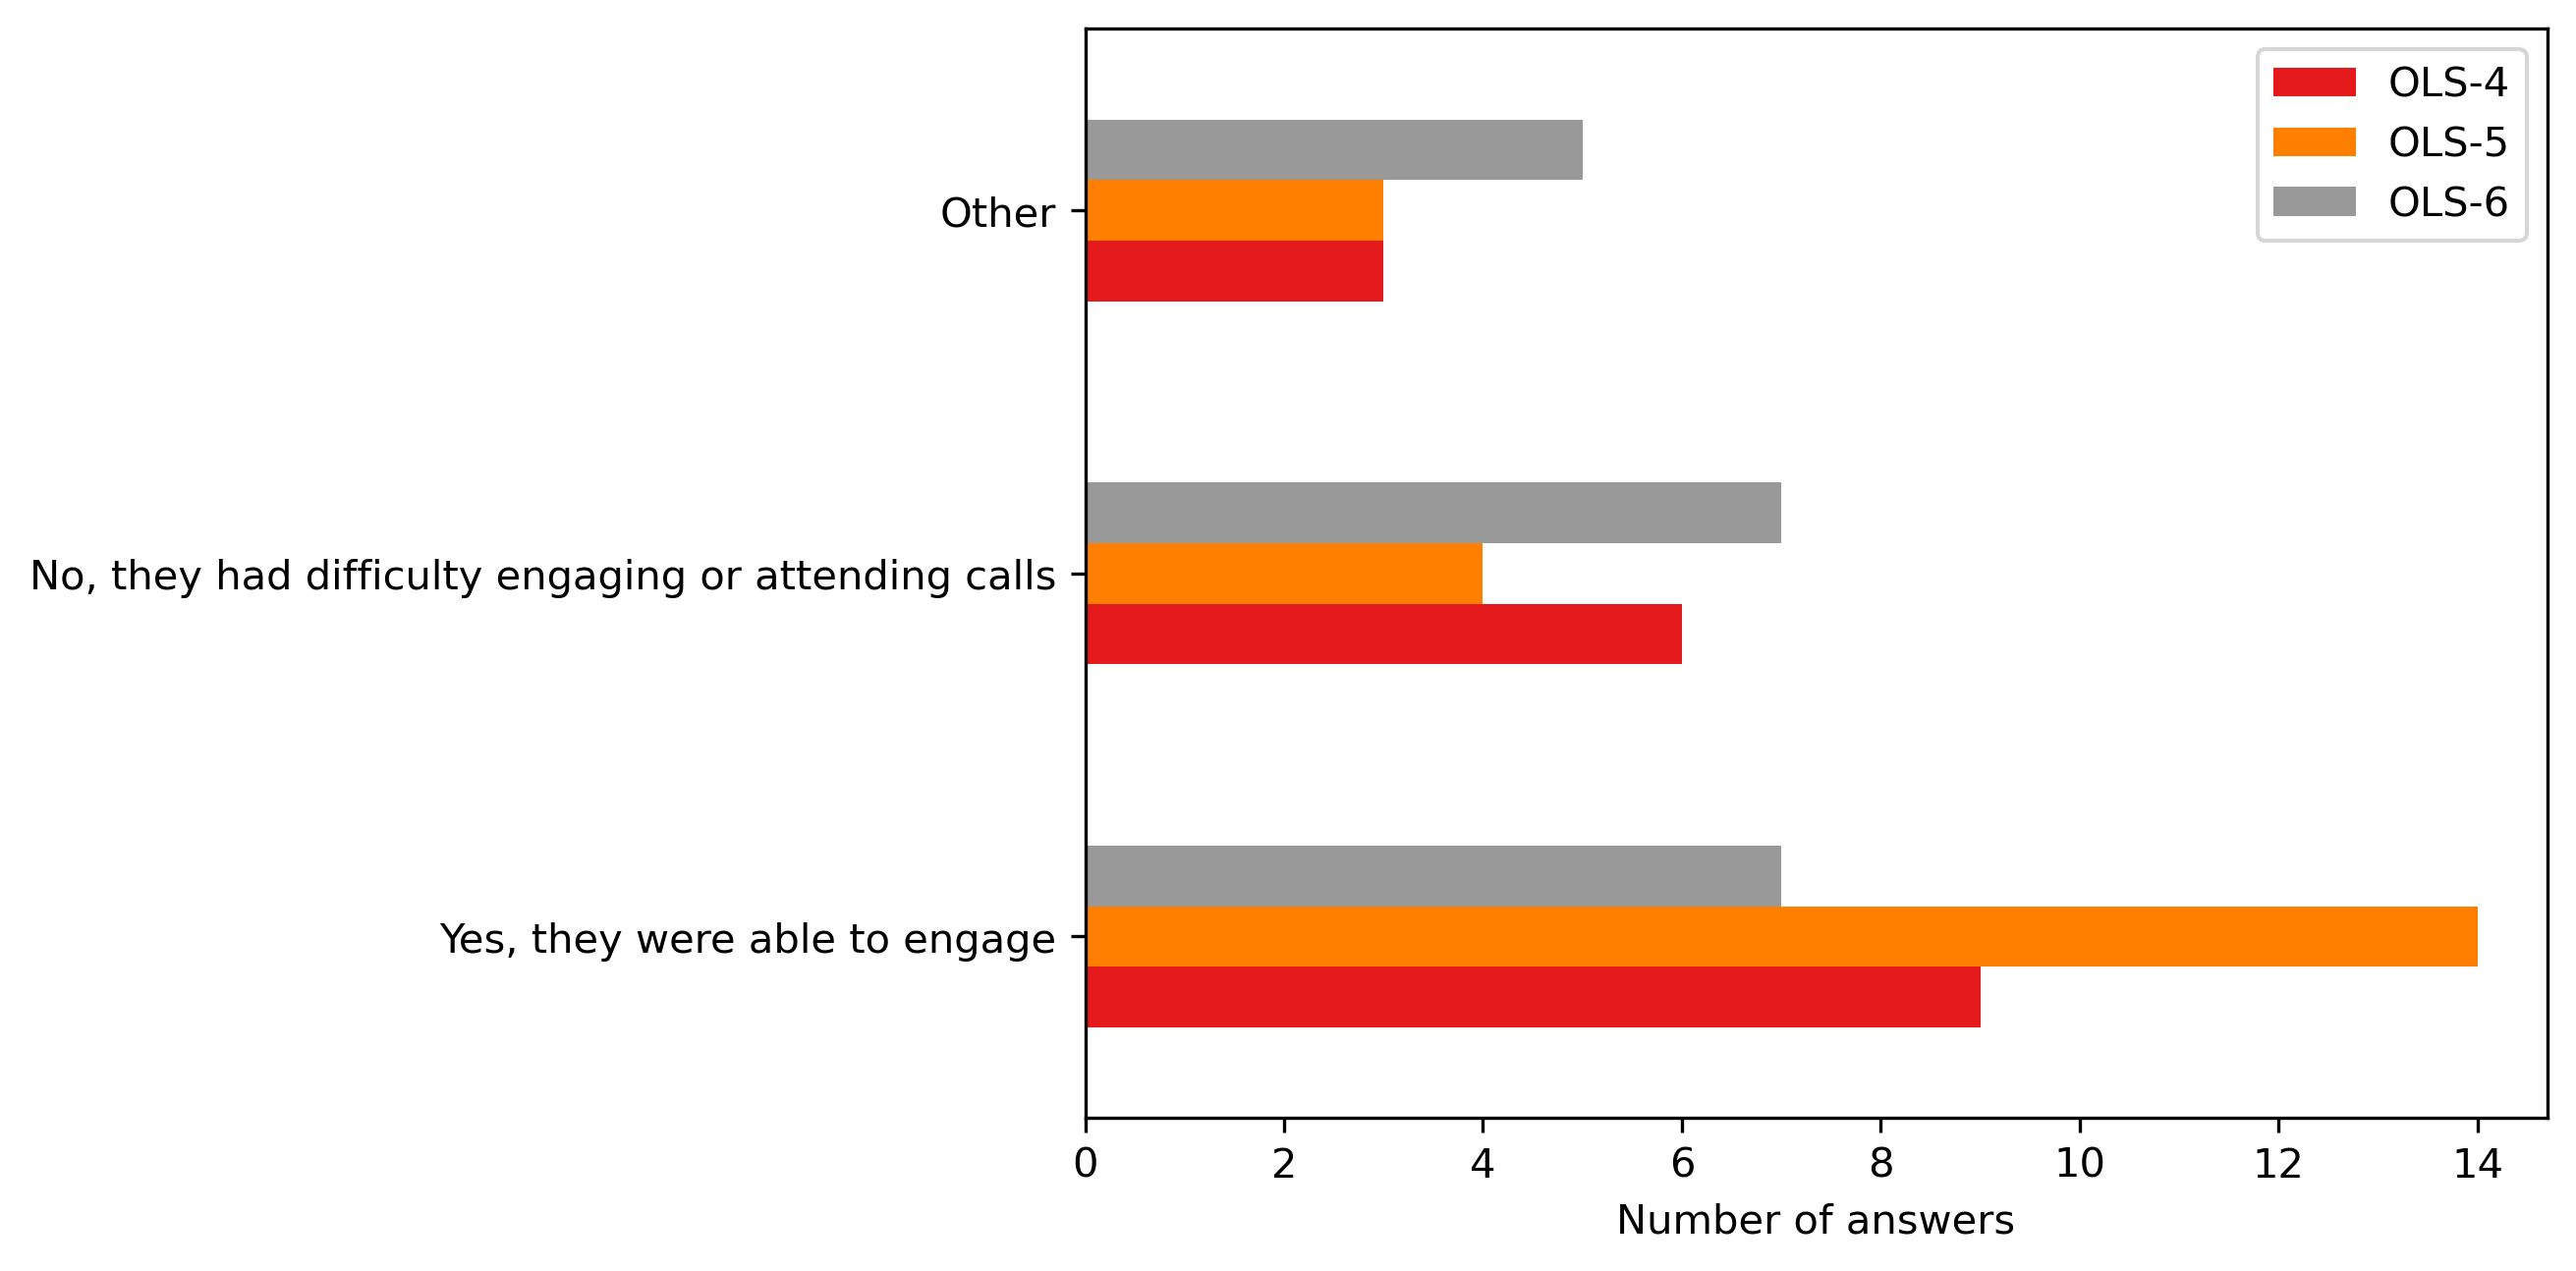

In [14]:
fig, ax = plt.subplots()
fig.set_dpi(300)
q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Number of answers')
#plt.savefig('../', bbox_inches='tight')